In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
asthma = pd.read_csv('/kaggle/input/asthma-disease-prediction/processed-data.csv')
asthma.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [4]:
asthma['Gender'] = asthma['Gender_Female']
asthma.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Gender
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0


In [5]:
asthma.columns

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity_Mild',
       'Severity_Moderate', 'Severity_None', 'Gender'],
      dtype='object')

In [6]:
asthma.describe()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Gender
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.250000,0.250000,0.250000,0.333333
std,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.433013,0.433013,0.433013,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.250000,0.250000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
y_1 = asthma['Severity_Mild']
y_2 = asthma['Severity_Moderate']
y_0 = asthma['Severity_None']

X_values = asthma[['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
        'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
        'Age_60+', 'Gender_Female']]
X_values.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female
0,1,1,1,1,1,1,1,1,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,0,0,0,0


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_values, y_1, test_size=0.2, random_state=42)
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
6336/6336 [==============================] - 13s 2ms/step - loss: 0.5668 - accuracy: 0.7495 - val_loss: 0.5574 - val_accuracy: 0.7547
Epoch 2/50
6336/6336 [==============================] - 12s 2ms/step - loss: 0.5637 - accuracy: 0.7495 - val_loss: 0.5573 - val_accuracy: 0.7547
Epoch 3/50
6336/6336 [==============================] - 12s 2ms/step - loss: 0.5633 - accuracy: 0.7495 - val_loss: 0.5572 - val_accuracy: 0.7547
Epoch 4/50
6336/6336 [==============================] - 13s 2ms/step - loss: 0.5631 - accuracy: 0.7495 - val_loss: 0.5573 - val_accuracy: 0.7547
Epoch 5/50
6336/6336 [==============================] - 13s 2ms/step - loss: 0.5631 - accuracy: 0.7495 - val_loss: 0.5574 - val_accuracy: 0.7547
Epoch 6/50
6336/6336 [==============================] - 13s 2ms/step - loss: 0.5630 - accuracy: 0.7495 - val_loss: 0.5574 - val_accuracy: 0.7547
Epoch 7/50
6336/6336 [==============================] - 13s 2ms/step - loss: 0.5630 - accuracy: 0.7495 - val_loss: 0.5573 - val_ac

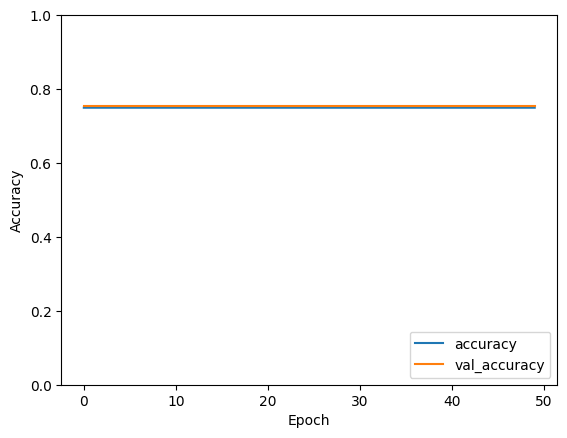

In [11]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

1980/1980 - 2s - loss: 0.5647 - accuracy: 0.7479 - 2s/epoch - 1ms/step

Test accuracy: 0.7478693127632141


In [13]:
predictions = model.predict(X_test)

1980/1980 [==============================] - 2s 950us/step
